# Analysis of Single-Stage Vapor Compression Machine

This notebook continues with the simulation of the vapor compression machine (VCM) at varying compressor speeds and varying outdoor air temperature. Aim of this analysis is to find a relation between outdoor air temperature and compressor speed in order to control the refrigeration capacity of the VCM to a constant target value.

In [1]:
import ex07_multi_analysis_2b as oat_analysis
from hvac.charts import LineChart

In [2]:
# get simulation data with varying compressor speed and varying outdoor air temperature
df = oat_analysis.read_dataframe()

Suppose we want to control refrigeration capacity to a constant value of 3.5 kW independent of outdoor air temperature. Other operating conditions remain constant:
- state of air entering the evaporator: 24 °C DB, 50 % RH
- mass flow rate of air through the evaporator: 1500 kg / hr
- mass flow rate of air through the condenser: 2233.861 kg / hr

The function `plot_ctrl_n_cmp` in module `ex07_multi_analysis_2b.py` determines at every outdoor air temperature in the simulation data the compressor speed that corresponds with the target refrigeration capacity. This is done by linear interpolation of the refrigeration capacity values and their corresponding compressor speeds closest to the target value. The log messages below mention which compressor speed would result in the target refrigeration capacity at every outdoor air temperature in the simulation data. The blue dots in the chart below show these points. Next, a relation between compressor speed and outdoor air temperature is determined by curve-fitting, assuming a linear relation (the orange straight line in the chart below). The function returns a tuple with the parameters `a` and `b` of this straight line `a * x + b`.

[14088 | ex07_multi_analysis_2b | DEBUG] at 26 °C: to get refrigeration capacity 3.5 kW, use speed 2572.902229225143 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 28 °C: to get refrigeration capacity 3.5 kW, use speed 2704.9655488824756 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 30 °C: to get refrigeration capacity 3.5 kW, use speed 2745.636876825656 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 32 °C: to get refrigeration capacity 3.5 kW, use speed 2906.9446820316293 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 34 °C: to get refrigeration capacity 3.5 kW, use speed 2907.4603899087265 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 36 °C: to get refrigeration capacity 3.5 kW, use speed 2953.015905168342 rpm
[14088 | ex07_multi_analysis_2b | DEBUG] at 38 °C: to get refrigeration capacity 3.5 kW, use speed 3091.4596441719427 rpm


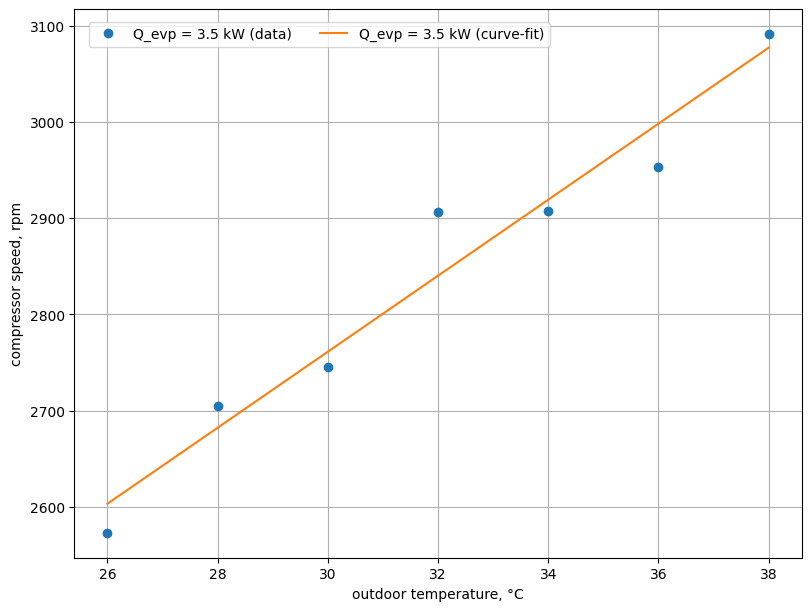

39.52850840403939 1575.4284847318258


In [4]:
a, b = oat_analysis.plot_ctrl_n_cmp(df, target_Q_evp=3.5)
print(a, b)